In [1]:
# data manipulation
import numpy as np
import pandas as pd
# visualizaiton
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# regressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# metrics
from sklearn.metrics import mean_squared_error
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data

# fetch housing data
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
housing1 = load_boston()
# subsume into a dataframe
data = pd.DataFrame(housing1.data, columns=housing1.feature_names)
# append target to dataframe
data['MEDV'] = housing1.target
# verify the dataframe
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# specify features and target
X = data.drop('MEDV', axis=1)               # Feature
y = data['MEDV']                            # Label
# split the datasets into training and testing data in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# check the train/test length
print(f"Train and Test Size {X_train.shape}, {X_test.shape}")

Train and Test Size (404, 13), (102, 13)


In [4]:
# regression clss

class Regression:
    def __init__(self, X, y, testsize):

        self.X = X
        self.y = y
        self.testsize = testsize
        
        # split training and testing dataset
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=self.testsize, random_state=0)

    def fit_predict(self, estimator, transformer, alpha=None, l1_ratio=None):
        
        try:
            # subsume estimators and transformer into a pipeline
            pipe = Pipeline([
            ('scaler', transformer), 
            ('regressor', estimator)
            ])

            # fit/train model
            pipe.fit(self.X_train, self.y_train)

            # predict lables
            y_pred = pipe.predict(self.X_test)

        except Exception as e:
            print(str(e))

        return pipe, pipe['regressor'].intercept_, pipe['regressor'].coef_, y_pred

    def eval_metrics(self, pipe, y_pred):

        # evaluate metrics
        mse = mean_squared_error(self.y_test, y_pred, squared=True)
        rmse = mean_squared_error(self.y_test, y_pred, squared=False)
        r2train = pipe.score(self.X_train, self.y_train)
        r2test = pipe.score(self.X_test, self.y_test)

        return mse, rmse, r2train, r2test

    def plot_coeff(self, modelname):

        coef = []
        model = Regression(self.X, self.y, 0.20)
        alpha_range = np.logspace(2, -2, 200)

        if modelname == 'Lasso':
            for i in alpha_range:    
                coef.append(model.fit_predict(Lasso(alpha=i, random_state=0), StandardScaler())[2])

        elif modelname == 'Ridge':
            alpha_range = np.logspace(6, -2, 200)
            for i in alpha_range:    
                coef.append(model.fit_predict(Ridge(alpha=i, random_state=0), StandardScaler())[2])

        elif modelname == 'ElasticNet':
            for i in alpha_range:    
                coef.append(model.fit_predict(ElasticNet(alpha=i, random_state=0), StandardScaler())[2])
        
        # Plot Coefficients
        fig = plt.figure(figsize=(20,8))
        ax = plt.axes()
        
        ax.plot(alpha_range, coef)
        ax.set_xscale('log')
        # ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
        ax.set_title(f'{modelname} coefficients as a function of the regularization')
        ax.set_xlabel('$\lambda$')
        ax.set_ylabel('$\mathbf{w}$')

        return plt.show()

In [5]:
# linear regression
lr = Regression(X, y, 0.20)

# fit Linear Regression
pipe , intercept, coef, y_pred = lr.fit_predict(LinearRegression(), StandardScaler())
pipe , intercept, coef, y_pred

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('regressor', LinearRegression())]),
 22.611881188118804,
 array([-0.97082019,  1.05714873,  0.03831099,  0.59450642, -1.8551476 ,
         2.57321942, -0.08761547, -2.88094259,  2.11224542, -1.87533131,
        -2.29276735,  0.71817947, -3.59245482]),
 array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
        19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
         5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
        32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
        24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
        10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
        18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
        19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
        26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
        25.17247952, 20.11

In [6]:
# evaluate metrics
mse, rmse, r2train, r2test = lr.eval_metrics(pipe, y_pred)
mse, rmse, r2train, r2test

(33.448979997676496, 5.783509315085133, 0.7730135569264234, 0.5892223849182512)

In [7]:
# instantiate 
laso = Regression(X,y,0.20)

# fit Lasso 
p , intercept, coef, y_pred = laso.fit_predict(Lasso(alpha=0.5, random_state=0), StandardScaler())
p , intercept, coef, y_pred

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('regressor', Lasso(alpha=0.5, random_state=0))]),
 22.611881188118804,
 array([-0.24685891,  0.        , -0.        ,  0.34198253, -0.        ,
         2.85082015, -0.        , -0.        , -0.        , -0.21487168,
        -2.01232059,  0.42645552, -3.52191399]),
 array([26.8192082 , 21.63194283, 27.54414556, 12.7977086 , 22.43077143,
        20.69540399, 19.66633901, 21.71207992, 17.25514882, 20.44068712,
        11.57295119, 16.05544551, 18.01259276,  5.83493875, 38.88931663,
        32.98564929, 21.40580286, 36.49376467, 29.18543951, 22.32662714,
        25.07186854, 24.54702325, 19.15589517, 27.18698515, 22.18919155,
         8.86737517, 18.62245036, 21.61787811, 34.75120579, 20.38964599,
        17.43294174, 18.80146601, 23.12890707, 23.92812505, 26.88003313,
        18.90182525, 12.02989036, 21.83270977, 16.91728916, 14.1520209 ,
        26.48144667, 20.71251465, 25.16587535, 14.20084502, 28.03722482,
        25.8

In [8]:
# evaluate metrics
mse, rmse, r2train, r2test = laso.eval_metrics(p, y_pred)
mse, rmse, r2train, r2test # sign of overfitting

(39.74305229214448, 6.304209093307779, 0.7314750410251336, 0.5119266346008046)

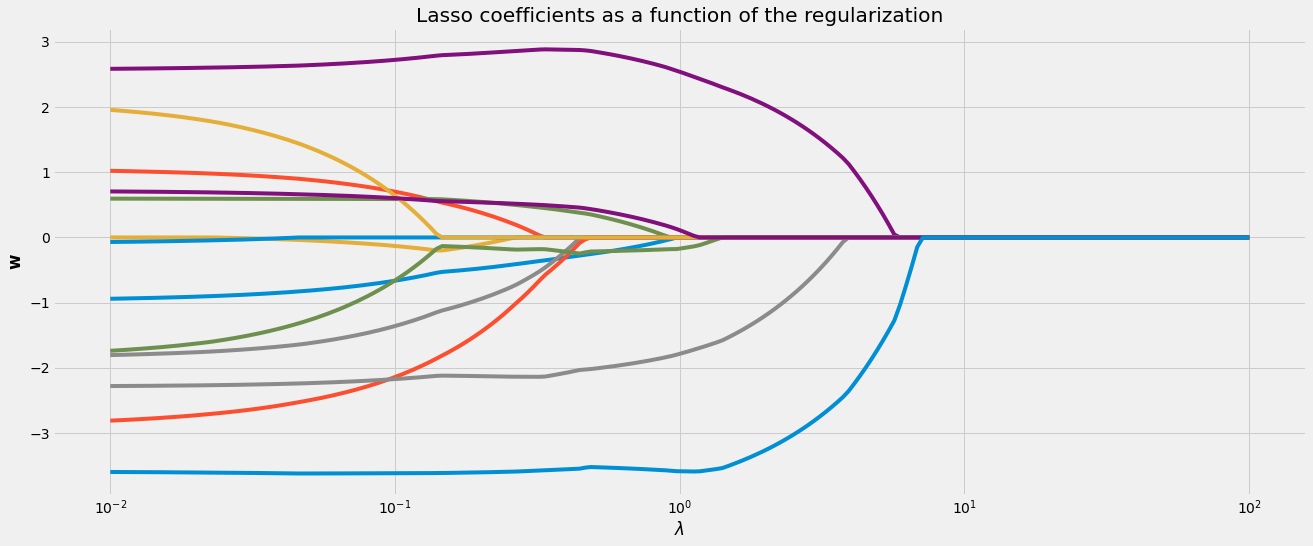

In [9]:
laso.plot_coeff('Lasso')

In [10]:
# instantiate 
rid = Regression(X,y,0.20)

# fit Ridge 
p , intercept, coef, y_pred = rid.fit_predict(Ridge(alpha=1, random_state=0), StandardScaler())
p , intercept, coef, y_pred

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('regressor', Ridge(alpha=1, random_state=0))]),
 22.611881188118804,
 array([-0.96225708,  1.04087205,  0.01168009,  0.59871898, -1.82013351,
         2.58378594, -0.09518768, -2.8482632 ,  2.03623116, -1.80609168,
        -2.28319087,  0.71831036, -3.5760731 ]),
 array([24.97081322, 23.65921764, 29.3344724 , 12.11478845, 21.46422887,
        19.31137639, 20.45846606, 21.35489571, 18.87940907, 19.94773734,
         5.1776166 , 16.35740825, 17.08120465,  5.59158371, 39.98690995,
        32.51579804, 22.41022342, 36.86085161, 30.854559  , 23.14327742,
        24.77654466, 24.64544196, 20.6097553 , 30.30395454, 22.40656374,
        10.15272044, 17.67390437, 18.32189128, 35.54805739, 20.98525845,
        18.27310501, 17.79098607, 19.98825807, 24.04648094, 29.0775874 ,
        19.2888657 , 11.17060077, 24.53574534, 17.54645046, 15.46388667,
        26.18199114, 20.86079365, 22.40311955, 15.55774497, 23.13751008,
        25.171

In [11]:
# evaluate metrics
mse, rmse, r2train, r2test = rid.eval_metrics(p, y_pred)
mse, rmse, r2train, r2test

(33.5371130739407, 5.791123645195352, 0.7729986739069824, 0.5881400471345537)

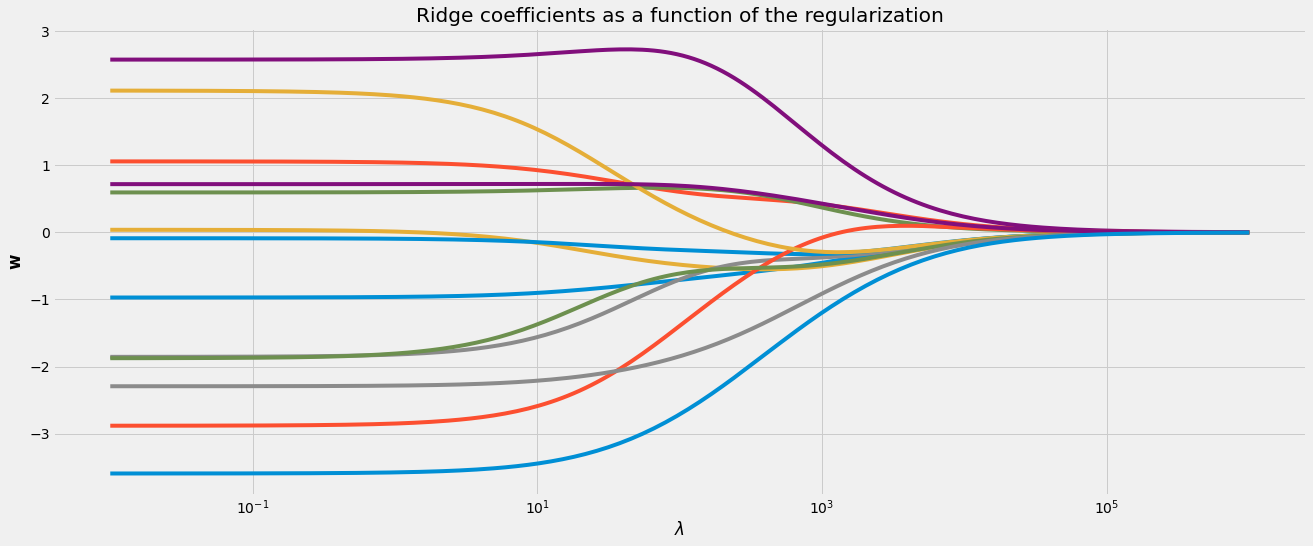

In [12]:
rid.plot_coeff('Ridge')

In [13]:
# instantiate 
elastic = Regression(X,y,0.20)

# fit ElasticNet
p , intercept, coef, y_pred = elastic.fit_predict(ElasticNet(alpha=0.1, l1_ratio=1e-10, random_state=0), StandardScaler())
p , intercept, coef, y_pred

(Pipeline(steps=[('scaler', StandardScaler()),
                 ('regressor',
                  ElasticNet(alpha=0.1, l1_ratio=1e-10, random_state=0))]),
 22.611881188118804,
 array([-0.79640441,  0.73361095, -0.37184626,  0.6597491 , -1.07128084,
         2.72601494, -0.22195884, -1.9970911 ,  0.79809702, -0.83825513,
        -2.04601356,  0.71899491, -3.11852809]),
 array([26.10253417, 22.19026723, 28.74651094, 12.06894567, 21.83579999,
        19.93714871, 19.66800025, 21.47935184, 18.54886253, 20.09681985,
         6.23291881, 15.73384114, 17.19137289,  5.85964769, 39.2023617 ,
        32.70674053, 21.39201922, 36.7016369 , 30.32452342, 22.98574548,
        24.81149233, 24.01722591, 20.67776144, 29.24813368, 22.31990556,
         8.66553266, 18.32063933, 19.30286707, 35.32407289, 21.25438117,
        17.66625528, 17.80786249, 20.78325758, 23.94344349, 28.32492191,
        19.44960775, 11.6351141 , 23.44816261, 16.71508506, 14.97047248,
        25.82914901, 21.04534611, 23.80763151,

In [14]:
# evaluate metrics
mse, rmse, r2train, r2test = elastic.eval_metrics(p, y_pred)
mse, rmse, r2train, r2test

(36.11741246581543, 6.0097764073063, 0.7656852297022345, 0.5564521083554097)

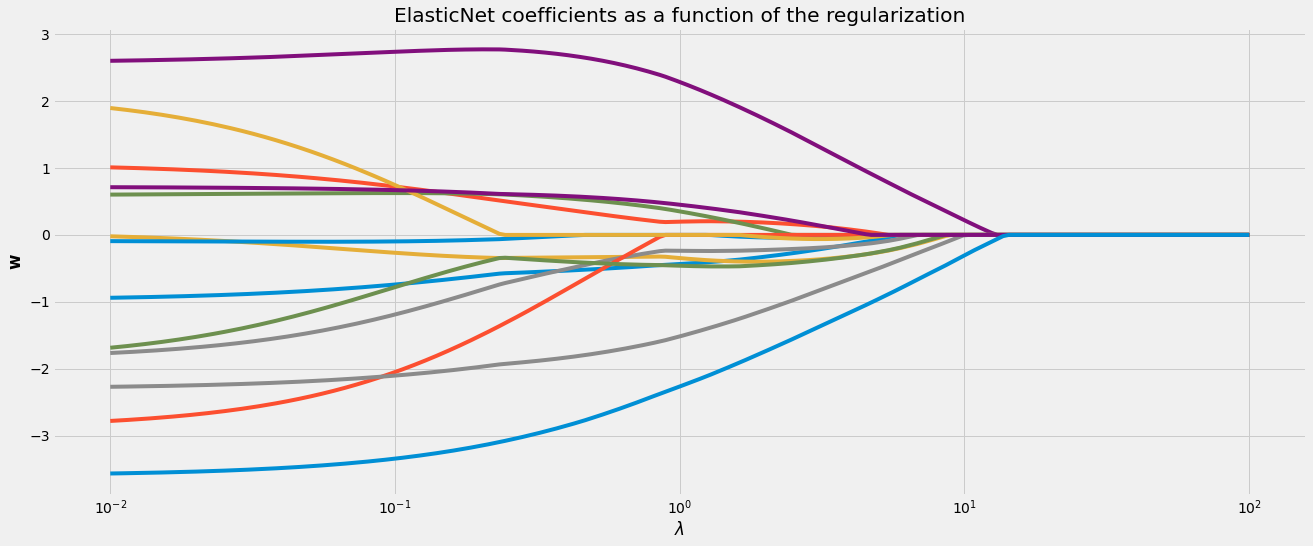

In [15]:
elastic.plot_coeff('ElasticNet')

In [16]:
# feature selection

# regression model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# fit/train model
pipe.fit(X, y)

# predict labels
y_pred = pipe.predict(X)

print(y_pred[:10])
print(f'R^2: {pipe.score(X, y):0.4}')

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211]
R^2: 0.7406


In [17]:
# method 1: VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
def vif(X):
    
    # perform feature scaling
    scaler = StandardScaler()
    xs = scaler.fit_transform(X)
    
    # subsume into a dataframe
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF Factor"] = [variance_inflation_factor(xs, i) for i in range(xs.shape[1])]
    
    return vif

In [18]:
# List scores
vif(X).round(2)

,Features,VIF Factor
0,CRIM,1.79
1,ZN,2.30
2,INDUS,3.99
3,CHAS,1.07
4,NOX,4.39
5,RM,1.93
6,AGE,3.10
7,DIS,3.96
8,RAD,7.48
9,TAX,9.01


In [19]:
# drop VIF score > 5
newX = X.drop(['TAX', 'RAD'],axis=1)
# scores in ascending values
vif(newX).sort_values(by="VIF Factor")

,Features,VIF Factor
3,CHAS,1.057805
9,B,1.316559
0,CRIM,1.478206
8,PTRATIO,1.496077
5,RM,1.872532
1,ZN,2.154483
10,LSTAT,2.936487
6,AGE,3.075755
2,INDUS,3.179166
4,NOX,3.901348


In [20]:
# filter first six features
X_method1 = X[['CHAS', 'B', 'CRIM', 'PTRATIO', 'RM', 'ZN']]
# regression model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# fit/train model
pipe.fit(X_method1, y)

# predict labels
y_pred = pipe.predict(X_method1)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method1, y):0.4}')

[28.57799551 24.78825544 30.16715122 28.03678666 29.13085894 23.98038835
 24.50415657 25.65810523 21.62521274 24.29070206]
R^2: 0.6273


In [21]:
# method 2: selct K best

from sklearn.feature_selection import f_regression, SelectKBest, SelectPercentile
# SelectKBest
# selector1 = SelectPercentile(f_regression, percentile=25)
method2 =  SelectKBest(f_regression, k=6) 
# fit the model
method2.fit(X,y)

SelectKBest(k=6, score_func=<function f_regression at 0x00000260329D33A0>)

In [22]:
# show selected features
method2.get_support(indices=True)

array([ 2,  4,  5,  9, 10, 12], dtype=int64)

In [23]:
# iterate the score
for f, s in zip(X.columns, method2.scores_):
    print(f'F-score: {s:0.4} for feature {f}')

F-score: 89.49 for feature CRIM
F-score: 75.26 for feature ZN
F-score: 154.0 for feature INDUS
F-score: 15.97 for feature CHAS
F-score: 112.6 for feature NOX
F-score: 471.8 for feature RM
F-score: 83.48 for feature AGE
F-score: 33.58 for feature DIS
F-score: 85.91 for feature RAD
F-score: 141.8 for feature TAX
F-score: 175.1 for feature PTRATIO
F-score: 63.05 for feature B
F-score: 601.6 for feature LSTAT


In [24]:
# filter six features with highest score
X_method2 = X[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]

In [25]:
# fit/train model
pipe.fit(X_method2, y)

# predict labels
y_pred = pipe.predict(X_method2)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method2, y):0.4}')

[30.57014999 26.10398705 32.45084162 31.0219246  30.41087418 27.1380861
 24.46192059 21.5381886  13.13415681 21.87515864]
R^2: 0.681


In [26]:
# check the coefficients
pipe['regressor'].coef_

array([ 0.59754458, -0.39395547,  3.26810054, -0.48846049, -1.9764135 ,
       -3.89469824])

In [27]:
# method 3: RFE

# feature Selection
from sklearn.feature_selection import RFECV, RFE

# Method 3
method3 = RFE(LinearRegression(), n_features_to_select=6, step=1)
method3.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [28]:
# check the selected position
method3.support_

array([False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False,  True])

In [29]:
# the feature ranking
method3.ranking_

array([3, 5, 4, 1, 1, 1, 8, 1, 2, 6, 1, 7, 1])

In [30]:
# select six features
min_value = min(method3.ranking_)
col = [i for i, x in enumerate(method3.ranking_) if x == min_value]
col

[3, 4, 5, 7, 10, 12]

In [31]:
# filter selected features
X_method3 = X[['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]

In [32]:
# fit/train model
pipe.fit(X_method3, y)

# predict labels
y_pred = pipe.predict(X_method3)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method3, y):0.4}')

[31.0142456  25.79278275 31.84611084 29.74856961 28.99930186 26.11951419
 23.13348366 19.51563196 10.99759368 19.25866209]
R^2: 0.7158


In [33]:
# check the coefficients
pipe['regressor'].coef_

array([ 0.82321941, -2.16945087,  2.88617319, -2.40778286, -2.16874483,
       -4.06526959])

In [34]:
# Method 4


method4 = RFECV(LinearRegression(), cv=10)
method4.fit(X,y)

RFECV(cv=10, estimator=LinearRegression())

In [35]:
# get the selected features with CV
method4.n_features_

6

In [36]:
# get the index of the selected features
method4.get_support(indices=True)

array([ 3,  4,  5,  7, 10, 12], dtype=int64)

In [37]:
# check the selected position
method4.support_

array([False, False, False,  True,  True,  True, False,  True, False,
       False,  True, False,  True])

In [38]:
# select six features
min_value = min(method4.ranking_)
col = [i for i, x in enumerate(method4.ranking_) if x == min_value]
col

[3, 4, 5, 7, 10, 12]

In [39]:
# iterate to get features
for i in range(len(col)):
    print(X.columns[col[i]])

CHAS
NOX
RM
DIS
PTRATIO
LSTAT


In [40]:
# filter selected features
X_method4 = X[['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]

In [41]:
# fit/train model
pipe.fit(X_method4, y)

# predict labels
y_pred = pipe.predict(X_method4)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method4, y):0.4}')

[31.0142456  25.79278275 31.84611084 29.74856961 28.99930186 26.11951419
 23.13348366 19.51563196 10.99759368 19.25866209]
R^2: 0.7158


In [42]:
# check the coefficients
pipe['regressor'].coef_

array([ 0.82321941, -2.16945087,  2.88617319, -2.40778286, -2.16874483,
       -4.06526959])

In [43]:
# method 5


import shap
# 100 instances for use as the background distribution
X100 = shap.utils.sample(X, 100, random_state=42)
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [44]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(pipe.predict, X100)
shap_values = explainer(X)

Permutation explainer: 507it [00:32, 12.31it/s]                                                                        


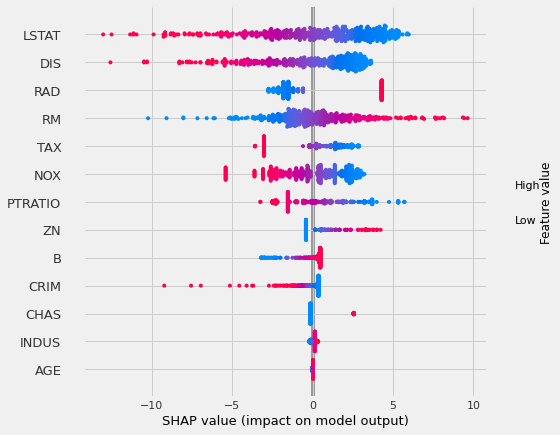

In [45]:
shap.plots.beeswarm(shap_values, max_display=14)

In [46]:
# filter selected features
X_method5 = X[['LSTAT', 'DIS', 'RM', 'PTRATIO', 'CRIM']]

In [47]:
# fit/train model
pipe.fit(X_method5, y)

# predict labels

y_pred = pipe.predict(X_method5)

print(y_pred[:10])
print(f'R^2: {pipe.score(X_method5, y):0.4}')

[31.63761273 25.5236182  32.0243847  30.38600726 29.5358719  26.50795486
 23.71933951 19.96956586 10.8068779  20.1215183 ]
R^2: 0.6958
